# Pareto chart(Dual axis chart)

In [1]:
# pandas 를 불러옵니다.
import pandas as pd

# marathon_2015_2017.csv 파일을 읽어옵니다.
marathon_2015_2017 = pd.read_csv("../marathon_data/marathon_2015_2017.csv")

# matplotlib 를 불러옵니다.
import matplotlib.pyplot as plt

In [2]:
# marathon_2015_2017 DataFrame 에서 Age 가 18 ~ 60까지인 데이터만 가져옵니다. 
runner_1860 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(18,60))]

# runner_1860 DataFrame에서 'Age'별로 몇명인지 카운팅 수를 갖는 runner_1860_counting Series을 생성합니다.
runner_1860_counting = runner_1860['Age'].value_counts()

In [3]:
# runner_1860 DataFrame의 기본정보를 확인합니다.
runner_1860.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73608 entries, 0 to 79637
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           73608 non-null  object
 1   Age            73608 non-null  int64 
 2   M/F            73608 non-null  object
 3   City           73607 non-null  object
 4   State          65438 non-null  object
 5   Country        73608 non-null  object
 6   5K             73608 non-null  int64 
 7   10K            73608 non-null  int64 
 8   15K            73608 non-null  int64 
 9   20K            73608 non-null  int64 
 10  Half           73608 non-null  int64 
 11  25K            73608 non-null  int64 
 12  30K            73608 non-null  int64 
 13  35K            73608 non-null  int64 
 14  40K            73608 non-null  int64 
 15  Pace           73608 non-null  int64 
 16  Official Time  73608 non-null  int64 
 17  Overall        73608 non-null  int64 
 18  Gender         73608 non-n

In [4]:
# runner_1860_counting Series를 확인합니다. 앞에 있는 것이 index, 뒤에 있는 것이 value
runner_1860_counting

45    3236
46    3039
40    2734
47    2566
50    2498
41    2494
35    2327
42    2318
48    2277
43    2265
36    2188
38    2128
51    2124
37    2108
39    2101
44    2056
49    2018
52    1930
55    1920
29    1906
30    1849
33    1834
31    1779
28    1758
34    1756
27    1755
53    1730
32    1726
26    1709
25    1539
56    1514
54    1433
24    1301
57    1287
58    1044
23     920
59     788
22     701
21     489
20     264
19     137
18      62
Name: Age, dtype: int64

In [5]:
# runner_1860_counting Series의 index 속성을 이용해 index 배열을 따로 저장
x = runner_1860_counting.index

# index가 int이기 때문에 18부터 정렬되는 것을 피하기 위해 x의 값을 string으로 변환시킨다.
x = [str(i) for i in x]

# runner_1860_counting Series의 value 속성을 이용해 value 배열을 따로 저장
y = runner_1860_counting.values

ratio = y / y.sum()         # 각각의 비율 계산
ratio_sum = ratio.cumsum()  # 누적 비율 계산

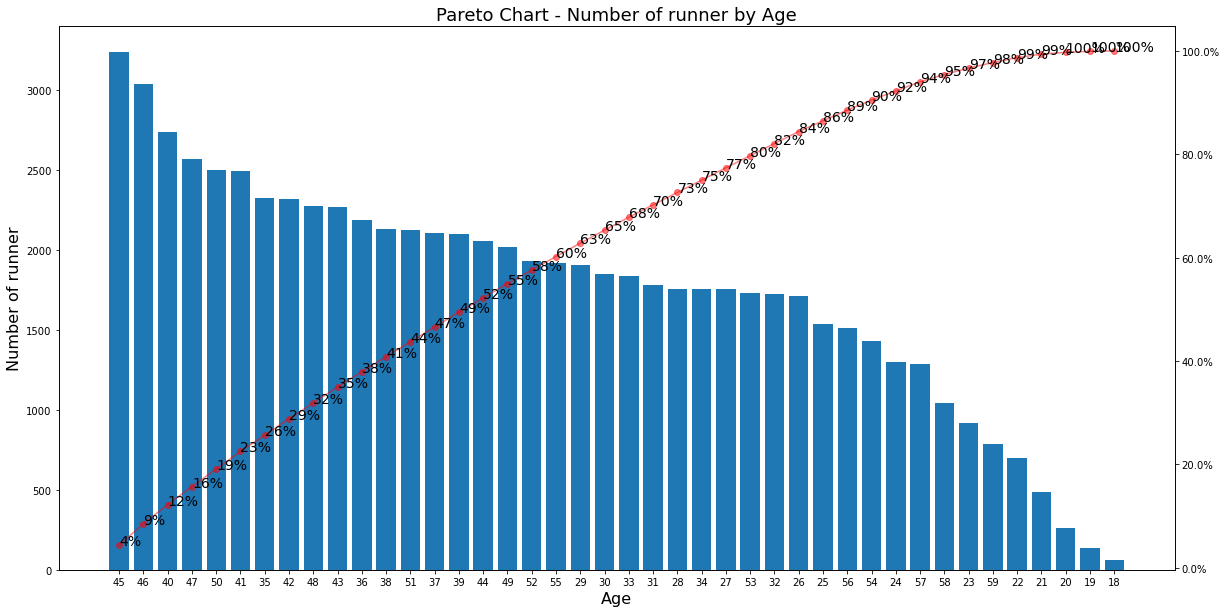

In [6]:
# 그림틀의 크기를 지정한다. 
fig, barChart = plt.subplots(figsize=(20,10))

# x축, y축 데이터를 지정하여 bar chart를 그립니다. x축은 나이, y축은 인원수
barChart.bar(x, y)

# lineChart가 barChart의 x축을 공유한다고 정의 
lineChart = barChart.twinx()    # twinx() 를 사용하여 x축을 공유 

# x축, y축 데이터를 지정하여 line chart를 그립니다. x축은 나이, y축은 누적 비율
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)  #  linestyle='-', color='빨강', maker='동그라미', alpha=0.5 투명도 

# 오른쪽에 y축의 레이블을 만든다
ranges = lineChart.get_yticks()
lineChart.set_yticklabels(['{0:.1%}'.format(x) for x in ranges])

# line chart 선 위에 annotations(누적비율)을 적어준다.
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)  # annotate 하면 차트에 보여줌, (x[i], ratio_sum[i]) 는 위치를 나타냄   

barChart.set_xlabel('Age', fontdict= {'size':16})                  # x축 lable 추가
barChart.set_ylabel('Number of runner', fontdict= {'size':16})     # y축 lable 추가
plt.title('Pareto Chart - Number of runner by Age', fontsize=18)   # 차트 title 추가

# 그래프를 출력
plt.show()